# Taller Análisis de Datos de Educación

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import gaussian_kde

In [45]:
# Cargar datos
ruta = r'C:\Users\omaroalvaradoc\Documents\Personal\Proyectos\CURSO IA\data\raw\taller_graficos_educacion.xlsx'
df = pd.read_excel(ruta)
print(df.head())

   ID_Estudiante  Edad     Genero  Horas_Estudio  Calificacion_Matematicas  \
0              1    16   Femenino           3.67                      2.98   
1              2    17   Femenino           3.03                      3.69   
2              3    15  Masculino           3.25                      4.57   
3              4    17  Masculino           4.31                      3.86   
4              5    17  Masculino           2.73                      4.62   

   Calificacion_Estadistica Uso_Tecnologia  Satisfaccion_Clase  
0                      3.10          Medio                   5  
1                      1.46          Medio                   2  
2                      3.15          Medio                   4  
3                      3.00          Medio                   1  
4                      2.92           Bajo                   4  


In [ ]:
# Examinar estructura
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID_Estudiante             300 non-null    int64  
 1   Edad                      300 non-null    int64  
 2   Genero                    300 non-null    object 
 3   Horas_Estudio             300 non-null    float64
 4   Calificacion_Matematicas  300 non-null    float64
 5   Calificacion_Estadistica  298 non-null    float64
 6   Uso_Tecnologia            300 non-null    object 
 7   Satisfaccion_Clase        300 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 18.9+ KB
None

        ID_Estudiante   Edad  Horas_Estudio  Calificacion_Matematicas  \
count         300.00 300.00         300.00                    300.00   
mean          150.50  15.41           2.57                      3.23   
std            86.75   1.69           1.07                  

In [42]:
# Limpiar valores nulos
print("Valores nulos ANTES de limpiar:")
print(df.isnull().sum())

# Reemplazar nulos en columnas numéricas con la MEDIA
for col in df.select_dtypes(include=[np.number]).columns:
    if df[col].isnull().sum() > 0:
        media = df[col].mean()
        df[col].fillna(media, inplace=True)
        print(f"✓ {col}: nulos reemplazados con media = {media:.2f}")

# Reemplazar nulos en columnas categóricas con la MODA
for col in df.select_dtypes(include=['object']).columns:
    if df[col].isnull().sum() > 0:
        moda = df[col].mode()[0]
        df[col].fillna(moda, inplace=True)
        print(f"✓ {col}: nulos reemplazados con moda = '{moda}'")

print("\nValores nulos DESPUÉS de limpiar:", df.isnull().sum().sum())

Valores nulos ANTES de limpiar:
ID_Estudiante               0
Edad                        0
Genero                      0
Horas_Estudio               0
Calificacion_Matematicas    0
Calificacion_Estadistica    0
Uso_Tecnologia              0
Satisfaccion_Clase          0
dtype: int64

Valores nulos DESPUÉS de limpiar: 0


In [43]:
# Guardar dataset limpio
ruta_salida = r'C:\Users\omaroalvaradoc\Documents\Personal\Proyectos\CURSO IA\data\processed\taller_graficos_educacion_limpio.xlsx'
os.makedirs(os.path.dirname(ruta_salida), exist_ok=True)
df.to_excel(ruta_salida, index=False)
print("Guardado")

Guardado


In [ ]:
# 1. Gráfico circular
col_tec = [c for c in df.columns if 'tecnolog' in c.lower()][0]
df[col_tec].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(7, 7))
plt.title(col_tec)
plt.ylabel('')
plt.show()

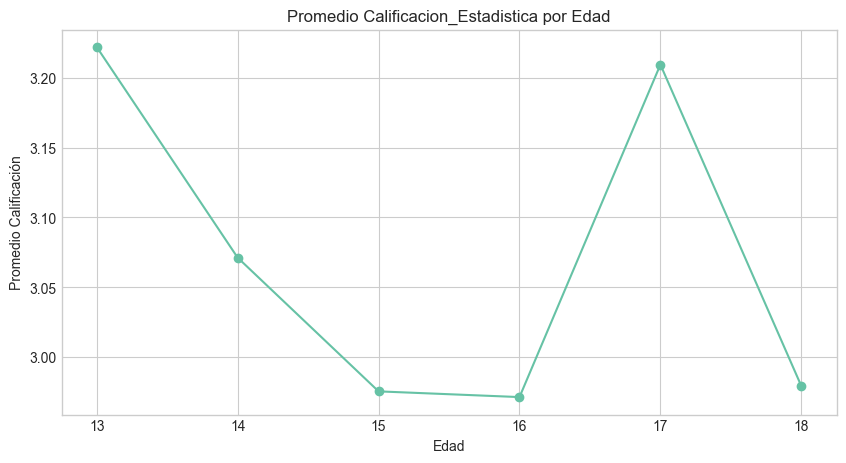

In [ ]:
# 2. Gráfico de líneas
col_edad = [c for c in df.columns if 'edad' in c.lower()][0]
col_est = [c for c in df.columns if 'estad' in c.lower()][0]
df.groupby(col_edad)[col_est].mean().plot(marker='o', figsize=(10, 5))
plt.xlabel('Edad')
plt.ylabel('Promedio')
plt.title(f'{col_est} por Edad')
plt.grid(True)
plt.show()

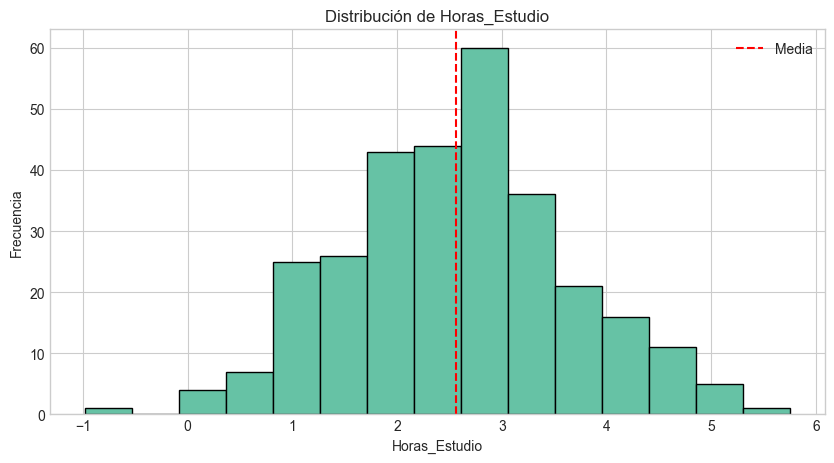

In [ ]:
# 3. Histograma
col_horas = [c for c in df.columns if 'hora' in c.lower()][0]
plt.figure(figsize=(10, 5))
plt.hist(df[col_horas], bins=15, edgecolor='black')
plt.axvline(df[col_horas].mean(), color='red', linestyle='--', label='Media')
plt.xlabel(col_horas)
plt.ylabel('Frecuencia')
plt.title(col_horas)
plt.legend()
plt.show()

<Figure size 800x600 with 0 Axes>

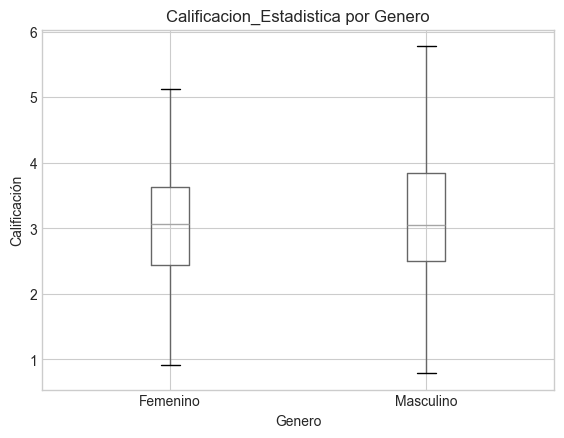

In [ ]:
# 4. Boxplot
col_gen = [c for c in df.columns if 'gen' in c.lower()][0]
df.boxplot(column=col_est, by=col_gen, figsize=(8, 6))
plt.suptitle('')
plt.title(f'{col_est} por {col_gen}')
plt.show()

Correlación: 0.023


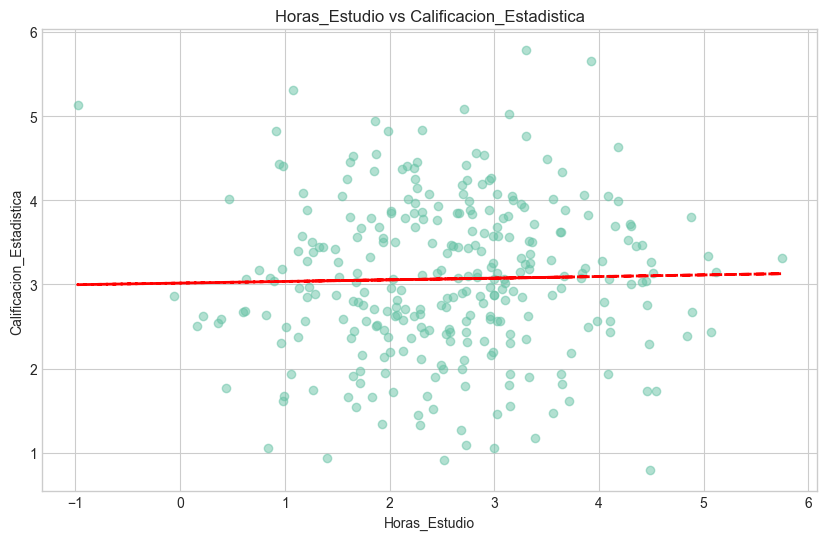

In [ ]:
# 5. Dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df[col_horas], df[col_est], alpha=0.5)
z = np.polyfit(df[col_horas], df[col_est], 1)
plt.plot(df[col_horas], np.poly1d(z)(df[col_horas]), "r--", linewidth=2)
plt.xlabel(col_horas)
plt.ylabel(col_est)
plt.title(f'{col_horas} vs {col_est}')
plt.grid(True)
plt.show()
print(f"Correlación: {df[col_horas].corr(df[col_est]):.3f}")

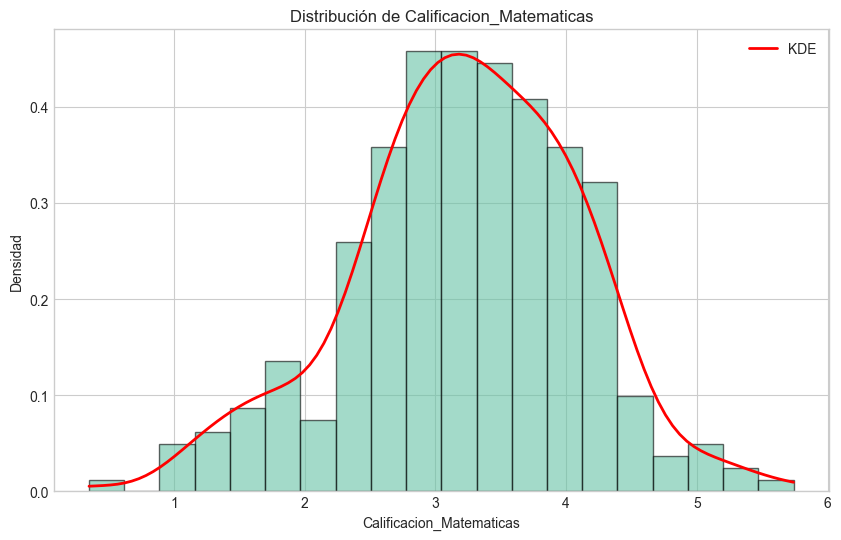

Media: 3.23
Desv. Std: 0.87


In [ ]:
# 6. Histograma con KDE
col_mat = [c for c in df.columns if 'mat' in c.lower()][0]
data = df[col_mat].dropna()

plt.figure(figsize=(10, 6))
plt.hist(data, bins=20, density=True, alpha=0.6, edgecolor='black', label='Histograma')

kde = gaussian_kde(data)
x = np.linspace(data.min(), data.max(), 100)
plt.plot(x, kde(x), 'r-', linewidth=2, label='KDE')

plt.xlabel(col_mat)
plt.ylabel('Densidad')
plt.title(col_mat)
plt.legend()
plt.show()
print(f"Media: {data.mean():.2f}, Desv: {data.std():.2f}")

## Análisis y Conclusiones

In [46]:
# Análisis de resultados para responder preguntas
print("="*80)
print("ANÁLISIS DE RESULTADOS")
print("="*80)

# 1. Nivel de tecnología predominante
col_tec = [c for c in df.columns if 'tecnolog' in c.lower()][0]
tec_predominante = df[col_tec].value_counts()
print("\n1. NIVEL DE USO DE TECNOLOGÍA PREDOMINANTE:")
print(tec_predominante)
print(f"→ Predomina: {tec_predominante.index[0]} ({tec_predominante.iloc[0]} estudiantes, {tec_predominante.iloc[0]/len(df)*100:.1f}%)")

# 2. Tendencia edad vs calificaciones
col_edad = [c for c in df.columns if 'edad' in c.lower()][0]
col_est = [c for c in df.columns if 'estad' in c.lower()][0]
edad_calif = df.groupby(col_edad)[col_est].mean()
correlacion_edad = df[col_edad].corr(df[col_est])
print(f"\n2. TENDENCIA EDAD VS CALIFICACIONES DE ESTADÍSTICA:")
print(edad_calif)
print(f"Correlación: {correlacion_edad:.3f}")
if correlacion_edad > 0:
    print(f"→ A mayor edad, {'mejores' if correlacion_edad > 0.3 else 'ligeramente mejores'} calificaciones")
else:
    print(f"→ A mayor edad, {'peores' if correlacion_edad < -0.3 else 'ligeramente peores'} calificaciones")

# 3. Distribución horas de estudio
col_horas = [c for c in df.columns if 'hora' in c.lower()][0]
print(f"\n3. DISTRIBUCIÓN DE HORAS DE ESTUDIO:")
print(f"Media: {df[col_horas].mean():.2f} horas")
print(f"Mediana: {df[col_horas].median():.2f} horas")
print(f"Mínimo: {df[col_horas].min():.2f} horas")
print(f"Máximo: {df[col_horas].max():.2f} horas")
print(f"Desv. Std: {df[col_horas].std():.2f}")
if df[col_horas].mean() > df[col_horas].median():
    print("→ Distribución sesgada a la derecha (pocos estudian mucho)")
else:
    print("→ Distribución sesgada a la izquierda (la mayoría estudia más)")

# 4. Diferencias por género
col_gen = [c for c in df.columns if 'gen' in c.lower()][0]
genero_stats = df.groupby(col_gen)[col_est].agg(['mean', 'std', 'count'])
print(f"\n4. RENDIMIENTO POR GÉNERO EN ESTADÍSTICA:")
print(genero_stats)
diferencia = abs(genero_stats['mean'].iloc[0] - genero_stats['mean'].iloc[1])
print(f"Diferencia entre géneros: {diferencia:.2f} puntos")
if diferencia > 2:
    print(f"→ Existe una diferencia notable de {diferencia:.2f} puntos")
else:
    print(f"→ Diferencia mínima ({diferencia:.2f} puntos), rendimiento similar")

# 5. Relación horas de estudio vs calificaciones
correlacion_horas = df[col_horas].corr(df[col_est])
print(f"\n5. RELACIÓN HORAS DE ESTUDIO VS CALIFICACIONES:")
print(f"Correlación: {correlacion_horas:.3f}")
if abs(correlacion_horas) < 0.3:
    print("→ Correlación débil: estudiar más horas no garantiza mejor nota")
elif abs(correlacion_horas) < 0.7:
    print("→ Correlación moderada: existe cierta relación positiva")
else:
    print("→ Correlación fuerte: más horas de estudio mejoran las calificaciones")

# 6. Forma distribución Matemáticas
col_mat = [c for c in df.columns if 'mat' in c.lower()][0]
data_mat = df[col_mat].dropna()
asimetria = data_mat.skew()
curtosis = data_mat.kurtosis()
print(f"\n6. DISTRIBUCIÓN DE CALIFICACIONES EN MATEMÁTICAS:")
print(f"Media: {data_mat.mean():.2f}")
print(f"Mediana: {data_mat.median():.2f}")
print(f"Asimetría: {asimetria:.3f}")
print(f"Curtosis: {curtosis:.3f}")
if abs(asimetria) < 0.5:
    print("→ Distribución aproximadamente simétrica")
elif asimetria > 0:
    print("→ Distribución sesgada a la derecha (cola hacia valores altos)")
else:
    print("→ Distribución sesgada a la izquierda (cola hacia valores bajos)")

print("\n" + "="*80)

ANÁLISIS DE RESULTADOS

1. NIVEL DE USO DE TECNOLOGÍA PREDOMINANTE:
Uso_Tecnologia
Medio    115
Bajo      97
Alto      88
Name: count, dtype: int64
→ Predomina: Medio (115 estudiantes, 38.3%)

2. TENDENCIA EDAD VS CALIFICACIONES DE ESTADÍSTICA:
Edad
13   3.22
14   3.07
15   2.97
16   2.97
17   3.21
18   2.98
Name: Calificacion_Estadistica, dtype: float64
Correlación: -0.054
→ A mayor edad, ligeramente peores calificaciones

3. DISTRIBUCIÓN DE HORAS DE ESTUDIO:
Media: 2.57 horas
Mediana: 2.60 horas
Mínimo: -0.98 horas
Máximo: 5.75 horas
Desv. Std: 1.07
→ Distribución sesgada a la izquierda (la mayoría estudia más)

4. RENDIMIENTO POR GÉNERO EN ESTADÍSTICA:
           mean  std  count
Genero                     
Femenino   3.01 0.87    162
Masculino  3.14 0.97    136
Diferencia entre géneros: 0.13 puntos
→ Diferencia mínima (0.13 puntos), rendimiento similar

5. RELACIÓN HORAS DE ESTUDIO VS CALIFICACIONES:
Correlación: 0.023
→ Correlación débil: estudiar más horas no garantiza mejor nota

## Respuestas

In [48]:
# Respuestas a las preguntas
col_tec = [c for c in df.columns if 'tecnolog' in c.lower()][0]
col_edad = [c for c in df.columns if 'edad' in c.lower()][0]
col_est = [c for c in df.columns if 'estad' in c.lower()][0]
col_horas = [c for c in df.columns if 'hora' in c.lower()][0]
col_gen = [c for c in df.columns if 'gen' in c.lower()][0]
col_mat = [c for c in df.columns if 'mat' in c.lower()][0]

print("="*80)
print("RESPUESTAS A LAS PREGUNTAS")
print("="*80)

# 1
tec = df[col_tec].value_counts().index[0]
print(f"\n1. ¿Qué nivel de uso de tecnología predomina?")
print(f"   R: {tec} ({df[col_tec].value_counts().iloc[0]/len(df)*100:.1f}%)")

# 2
corr_edad = df[col_edad].corr(df[col_est])
print(f"\n2. ¿Tendencia entre edad y calificaciones de Estadística?")
print(f"   R: Correlación {corr_edad:.3f} - {'Positiva' if corr_edad > 0 else 'Negativa'} {'fuerte' if abs(corr_edad) > 0.5 else 'moderada' if abs(corr_edad) > 0.3 else 'débil'}")

# 3
print(f"\n3. ¿Distribución de horas de estudio?")
print(f"   R: Media {df[col_horas].mean():.2f}h, Rango {df[col_horas].min():.0f}-{df[col_horas].max():.0f}h")

# 4
dif = abs(df.groupby(col_gen)[col_est].mean().iloc[0] - df.groupby(col_gen)[col_est].mean().iloc[1])
print(f"\n4. ¿Diferencias entre géneros?")
print(f"   R: Diferencia de {dif:.2f} puntos - {'Notable' if dif > 2 else 'Mínima'}")

# 5
corr_horas = df[col_horas].corr(df[col_est])
print(f"\n5. ¿Relación horas de estudio y calificaciones?")
print(f"   R: Correlación {corr_horas:.3f} - {'Fuerte' if abs(corr_horas) > 0.7 else 'Moderada' if abs(corr_horas) > 0.3 else 'Débil'}")

# 6
asim = df[col_mat].skew()
print(f"\n6. ¿Forma de distribución de Matemáticas?")
forma = 'Simétrica' if abs(asim) < 0.5 else f"Sesgada a la {'derecha' if asim > 0 else 'izquierda'}"
print(f"   R: {forma} (asimetría: {asim:.3f})")

# 7
print(f"\n7. ¿Conclusiones generales?")
print(f"   R: Grupo de {len(df)} estudiantes")
print(f"      - Promedio Estadística: {df[col_est].mean():.2f}")
print(f"      - Promedio Matemáticas: {df[col_mat].mean():.2f}")
print(f"      - Tecnología predominante: {tec}")
print(f"      - Correlación horas-notas: {corr_horas:.2f}")

print("\n" + "="*80)

RESPUESTAS A LAS PREGUNTAS

1. ¿Qué nivel de uso de tecnología predomina?
   R: Medio (38.3%)

2. ¿Tendencia entre edad y calificaciones de Estadística?
   R: Correlación -0.054 - Negativa débil

3. ¿Distribución de horas de estudio?
   R: Media 2.57h, Rango -1-6h

4. ¿Diferencias entre géneros?
   R: Diferencia de 0.13 puntos - Mínima

5. ¿Relación horas de estudio y calificaciones?
   R: Correlación 0.023 - Débil

6. ¿Forma de distribución de Matemáticas?
   R: Simétrica (asimetría: -0.285)

7. ¿Conclusiones generales?
   R: Grupo de 300 estudiantes
      - Promedio Estadística: 3.07
      - Promedio Matemáticas: 3.23
      - Tecnología predominante: Medio
      - Correlación horas-notas: 0.02

